### TEL354 - Minería de datos
# Taller 3

Nombre: Tomas Campusano Gaete

**Objetivo**

El objetivo del Taller 3 es encontrar reglas de decisión para clasificar animales en una de las 7 clases: `'Mamífero', 'Ave', 'Reptil', 'Pez', 'Anfibio', 'Insecto', 'Invertebrado'`. 

El archivo contiene atributos binarios de 99 animales diferentes, donde `0` indica ausencia y `1` presencia de esa característica, con excepción de la columna `patas` que es numérica entre `0` y `8`.

1. Cargar los datos del archivo `animales.csv` a un DataFrame y mostrarlo.

In [440]:
import pandas as pd
import matplotlib.pyplot as plt

In [441]:
df = pd.read_csv('animales.csv')
df

,animal,clase,pelo,plumas,huevos,leche,vuela,acuático,depredador,dentado,columna vertebral,respira,venenoso,aletas,patas,cola,doméstico
0,oso hormiguero,Mamífero,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0
1,antílope,Mamífero,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0
2,bajo,Pez,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0
3,oso,Mamífero,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0
4,jabalí,Mamífero,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,canguro,Mamífero,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0
95,avispa,Insecto,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0
96,lobo,Mamífero,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0
97,gusano,Invertebrado,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0


2. Generar el conjunto `X` con todas las filas del DataFrame y todas las columnas con excepción de `animal` y `clase`.

In [442]:
X = df.drop(['animal', 'clase'], axis=1)
X

,pelo,plumas,huevos,leche,vuela,acuático,depredador,dentado,columna vertebral,respira,venenoso,aletas,patas,cola,doméstico
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0
95,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0
96,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0
97,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0


3. La variable objetivo `y` será la columna `clase`, pero mapeando cada categoría a un valor numérico según el diccionario `d`.

In [443]:
d = {'Mamífero': 1,
 'Ave': 2,
 'Reptil': 3,
 'Pez': 4,
 'Anfibio': 5,
 'Insecto': 6,
 'Invertebrado': 7}

In [444]:
y = df['clase'].map(d)
y

0     1
1     1
2     4
3     1
4     1
     ..
94    1
95    6
96    1
97    7
98    2
Name: clase, Length: 99, dtype: int64

4. Separar los datos en conjuntos de entrenamiento (`X_train`, `y_train`) y testing (`X_test`, `y_test`) usando la función `train_test_split()` con `test_size=0.1`.

In [445]:
from sklearn.model_selection import train_test_split

In [446]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

print('Conjunto de entrenamiento X:\n', X_train)
print('Conjunto de prueba X:\n', X_test)
print('Conjunto de entrenamiento y:\n', y_train)
print('Conjunto de prueba y:\n', y_test)

Conjunto de entrenamiento X:
     pelo  plumas  huevos  leche  vuela  acuático  depredador  dentado  \
64     0       0       0      1      0         1           1        1   
33     1       0       0      1      0         0           0        1   
47     1       0       0      1      0         0           1        1   
75     0       0       1      0      0         1           1        0   
10     1       0       0      1      0         0           1        1   
..   ...     ...     ...    ...    ...       ...         ...      ...   
59     0       0       1      0      0         1           1        1   
27     1       0       0      1      0         0           0        1   
2      0       0       1      0      0         1           1        1   
37     1       0       1      0      1         0           0        0   
45     1       0       0      1      0         0           1        1   

    columna vertebral  respira  venenoso  aletas  patas  cola  doméstico  
64                

5. Entrenar un modelo de clasificación de tipo `DecisionTreeClassifier` con los datos de entrenamiento.

In [447]:
from sklearn.tree import DecisionTreeClassifier

In [448]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

DecisionTreeClassifier()

6. Predecir sobre el conjunto de testing `X_test` usando la función `predict()` y generar el vector `y_pred` con el resultado de la predicción.

In [449]:
y_pred = dtc.predict(X_test)
y_pred

array([2, 4, 1, 4, 6, 1, 1, 7, 1, 1], dtype=int64)

7. Mostrar el `accuracy_score` del modelo sobre los datos de testing `y_test`.

In [450]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

In [451]:
accuracy = accuracy_score(y_test,y_pred)
accuracy

1.0

8. Entregar la Matriz de Confusión e indicar que clases de animales confunde el modelo.

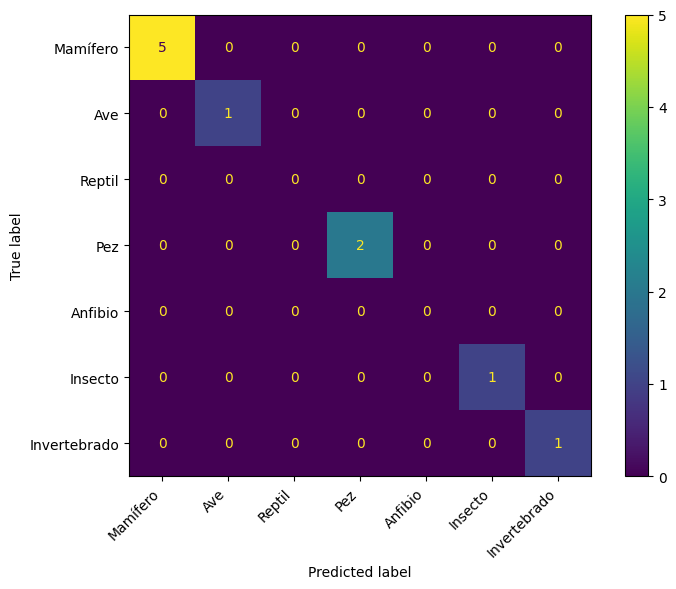

In [457]:
matriz_confusion = confusion_matrix(y_test,y_pred,labels=list(d.values()))
matriz_confusion
nombres_clase = ['Mamífero', 'Ave', 'Reptil', 'Pez', 'Anfibio', 'Insecto', 'Invertebrado']
disp = ConfusionMatrixDisplay(confusion_matrix=matriz_confusion,display_labels=nombres_clase)
fig, ax = plt.subplots(figsize=(8, 6))
disp.plot(ax=ax)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

9. Plotear el árbol de decisión con la función `plot_tree()`, cuyo primer parámetro es el clasificador y luego:
- El parámetro `feature_names` son los nombres de las columnas en el conjunto `X`.
- El parámetro `class_names` es una lista con las clases de animales, en este orden: `'Mamífero', 'Ave', 'Reptil', 'Pez', 'Anfibio', 'Insecto', 'Invertebrado'`. 
- El parámetro `filled`, permite de manera opcional, colorear los nodos de la misma clase si se iguala a `True`.

Asegúrese de establecer un tamaño adecuado para que el gráfico se vea (Por ejemplo, `figsize=(25, 20)`).

In [453]:
from sklearn.tree import plot_tree

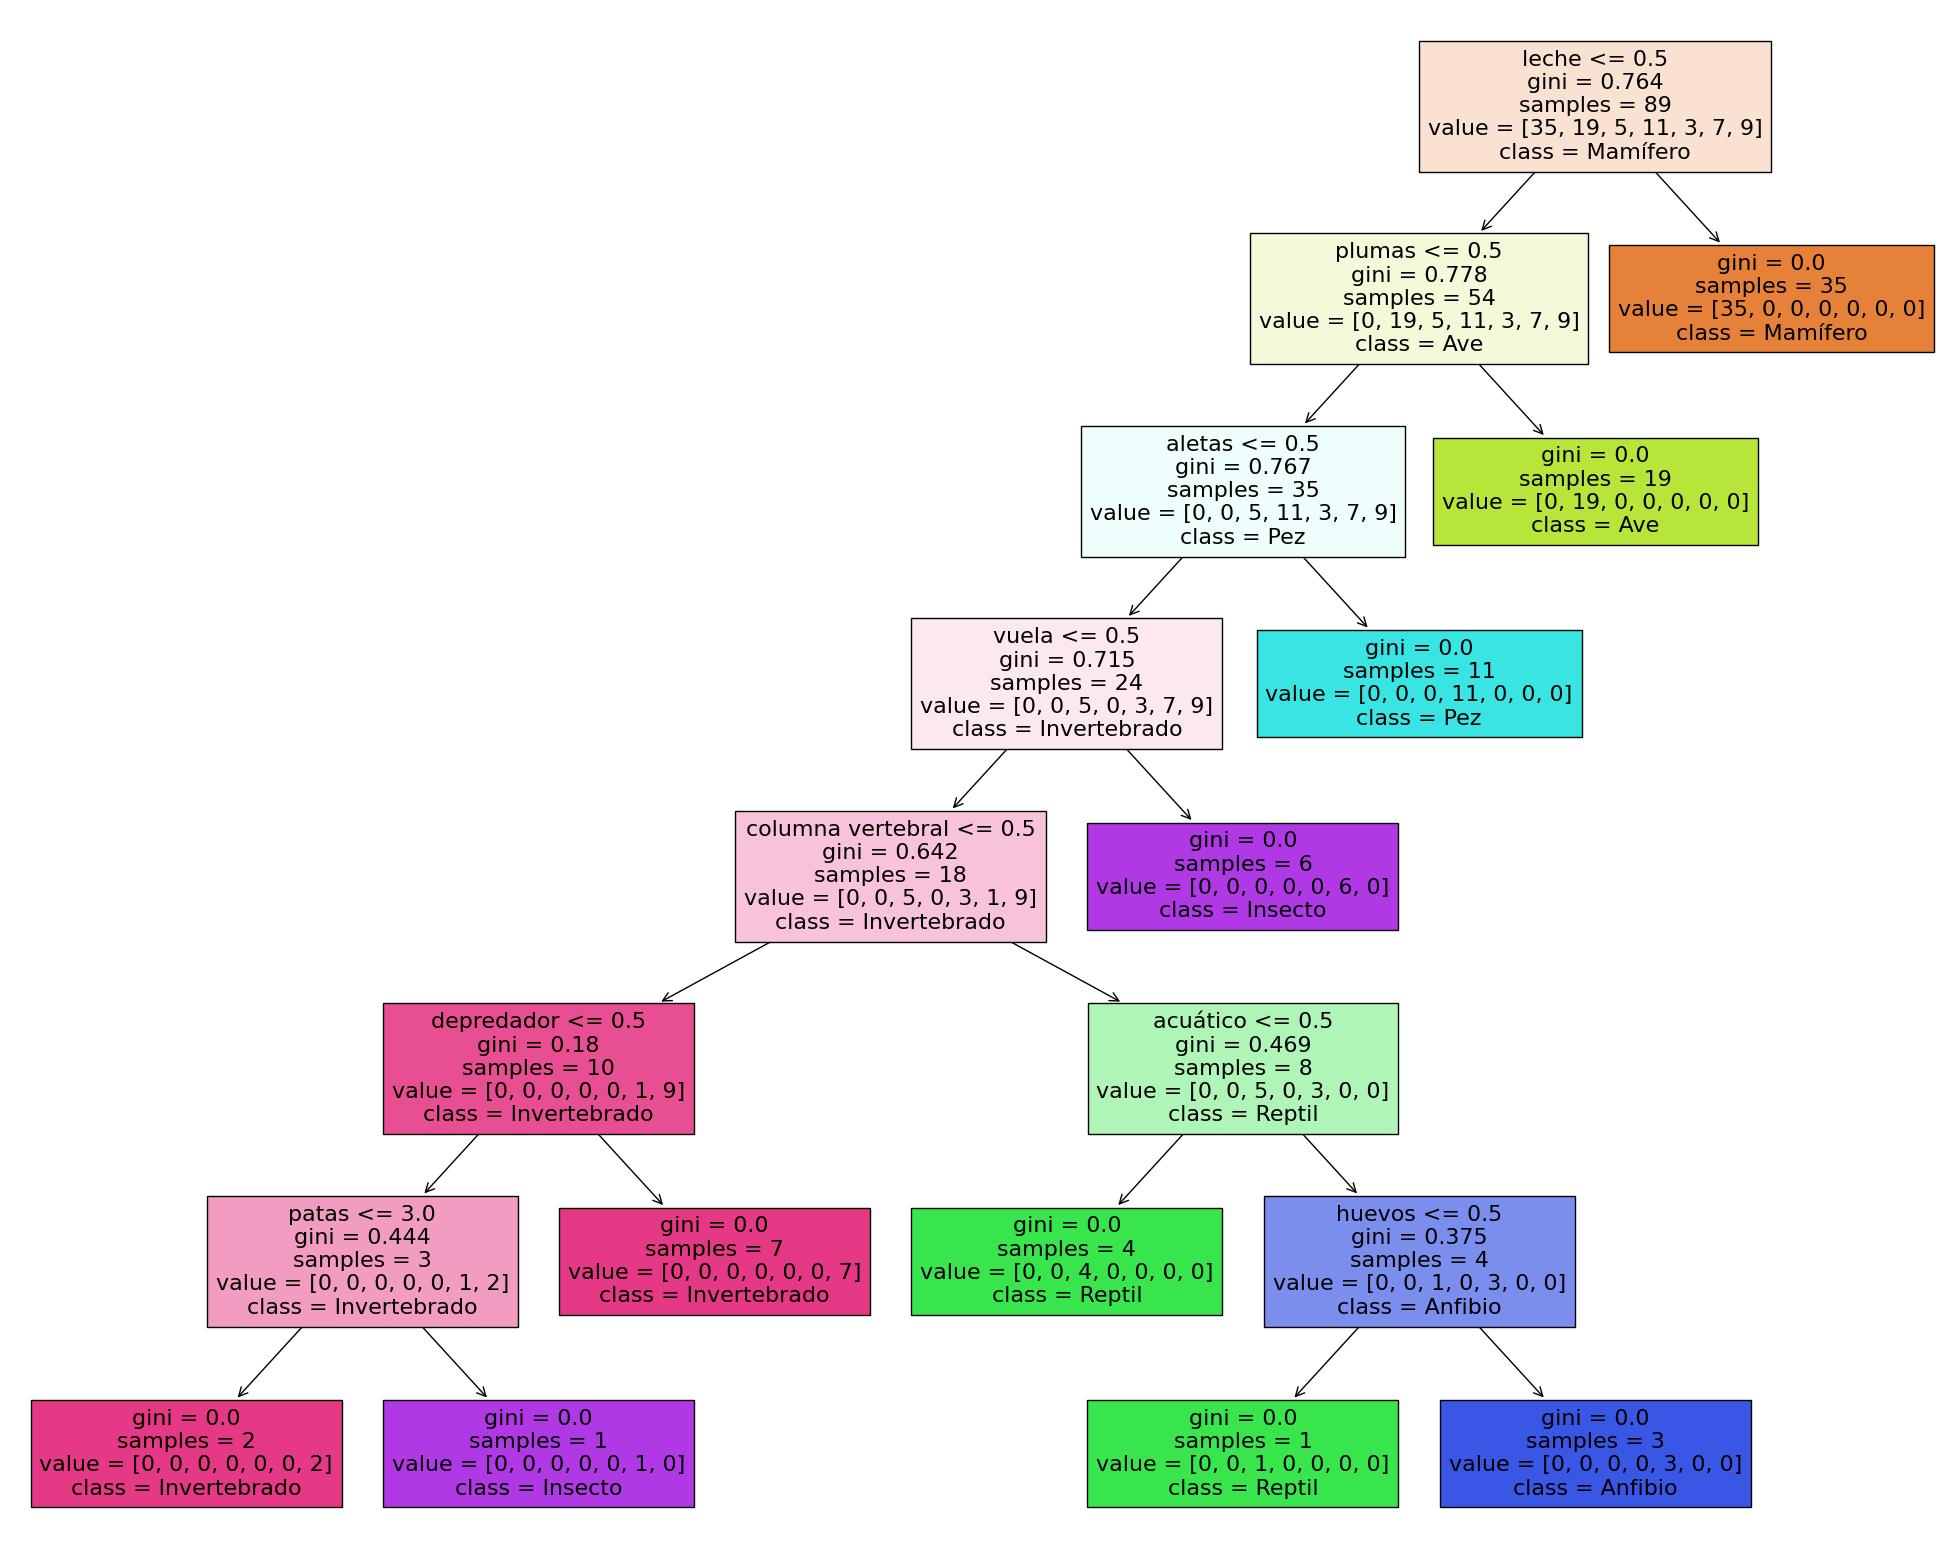

In [454]:
plt.figure(figsize=(25, 20))
plot_tree(dtc, feature_names=X.columns, class_names=list(d.keys()), filled=True)
plt.show()

10. Para cada hoja del árbol, entregue el número de animales en esa clase, indicando el porcentaje con respecto al total, y las condiciones que se deben cumplir para pertenecer a esa clase. Por ejemplo:

- 35 mamiferos dan leche , lo que representa un 100% de esta clase
- 19 aves tienen plumas y no dan leche , lo que representa un 100% de esta clase
- 11 peces tienen aletas , no tienen plumas y no dan leche  , lo que representa un 100% de esta clase
- 6 insectos vuelan , no tienen aletas , no tienen plumas y no dan leche , lo que representa un 86% de esta clase
- 4 reptiles no son acuaticos , tiene columna vertebral , no vuela , no tiene aletas , no tiene plumas y no dan leche , lo que representa un 80% de esta clase
- 1 reptil no pone huevos , es acuatico , tiene columna vertebral , no vuela , no tiene aletas , no tiene plumas y no da leche , lo que representa un 20% de esta clase
- 3 anfibios ponen huevos , son acuaticos , tienen columna vertebral , no vuelan , no tienen aletas , no tienen plumas y no dan leche , lo que representa un 100% de esta clase
- 7 invertabrados  son depredadores , no tienen columna vertebral , no vuelan , no tienen aletas , no tienen plumas y no dan leche , lo que representa un 78% de esta clase
- 2 invertabrados no tienen mas de 3 patas , no son depredadores , no tienen columna vertebral , no vuelan , no tienen aletas , no tienen plumas y no dan leche , lo que          representa un 22% de esta clase
- 1 insecto tiene mas de 3 patas , no es depradador , no tiene columna vertebral , no vuela , no tiene aletas , no tiene plumas y no da leche , lo que representa un 14% de esta clase
